# L1 Gassy

Block heights count the number of preceeding blocks.

In [1]:
import requests
import numpy as np
import seaborn as sns

In [137]:
# --- Request

url = "https://api.covalenthq.com/v1/1/block/latest/"
auth = ("ckey_400949948168421ebf17a073e5a", "")
r = requests.get(url, auth=auth)
block = r.json()
txs = block['transactions']
print(txs[0].keys())

dict_keys(['block_id', 'block_height', 'block_signed_at', 'tx_offset', 'hash', 'successful', 'version', 'size', 'mining_cost', 'from_address', 'to_address', 'to_label', 'from_label', 'creates', 'value', 'payload_size', 'contract_input', 'gas_offered', 'gas_spent', 'gas_price', 'gas_quote', 'transfers', 'eth_quote_rate', 'value_quote'])


In [138]:
for tx in txs[:2]:
    print_me = """
    Gas offered:\t{}
    Gas spent:\t\t{}
    Gas price:\t\t{}
    """
    print(print_me.format(tx["gas_offered"], tx["gas_spent"], tx["gas_price"]))



    Gas offered:	50000
    Gas spent:		21000
    Gas price:		165000000000
    

    Gas offered:	207128
    Gas spent:		21000
    Gas price:		120000000000
    


### Recall Gasprice, Gwei

gasprice is the price at which the gas is offered. 21000 gas is required for a typical transfer and Gwei is the ETH price being offered for each unit of gas.

E.g.

A normal transfer requires 21000 gas. I offer the transaction for 5 Gwei for a full gas spending of 21000 * 5 = 105000 Gwei = 0.000105 ETH

Some other person in a hurry offers for 10 Gwei for the same transaction which costs them 21000 * 10 = 210000 Gwei = 0.00021 ETH

In [139]:
gas_prices = np.array([x["gas_price"] for x in txs])/1e9 # In Gwei

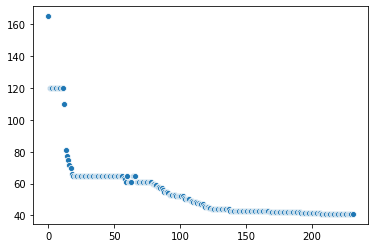

In [141]:
sns.scatterplot(x=range(len(gas_prices)), y=gas_prices);

# L2 Gassy


